
# Import required Libraries and read the data


In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv("MBA Salary.csv")
df.head(5)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


# view data description and understand

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [23]:
df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [24]:
# check null values
df.isnull().sum()

S. No.                    0
Percentage in Grade 10    0
Salary                    0
dtype: int64

# separate feature set and response variable.

In [25]:
X = sm.add_constant(df['Percentage in Grade 10'])
Y = df['Salary']
print(X.head(5))
print(Y.head(5))

   const  Percentage in Grade 10
0    1.0                   62.00
1    1.0                   76.33
2    1.0                   72.00
3    1.0                   60.00
4    1.0                   61.00
0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64


# Split the data into training and validation sets

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,Y,train_size=0.8, random_state=100)

# Fit the model and print summary statistics

In [30]:
model = sm.OLS(train_y,train_X).fit()

In [31]:
model.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

# Assumptions of linear regression
## 1. Residuals must  be normally distributed with a mean of 0
## 2. There should not be any corelation between residuals
## 3. Homoscedasticity ( Variance of residuals should be constant .... If not constant there is problem)
## 4. Multicollinearity ( there should not be corelation between independent features (X1 X2))
      ( Multicollinearity is not applicable for simple linear regression )

# Model Diagnostics
1. Co-efficient of Determination (R squared)
2. Hypothesis for Regression co-efficient
3. Analysis of Variance for overall model validity(imp for multiple LR)
4. Outlier analysis (Since they can effect the regression parameters)

In [32]:
#model paramters
model.params

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64

In [33]:
model.resid

0      18656.296611
11    -64222.528623
18    -48828.402452
45    -55605.907157
38     42140.995674
25    -10601.230584
26    -28616.654795
35    110019.820908
17      5868.537361
7     -37707.227686
47     -6267.815069
31    -44222.528623
32     73580.408291
19    -16661.941240
21     51383.345205
13    123883.961571
1    -102366.920585
4     -67783.116006
12    162413.947080
27    -76070.751983
40     91808.073251
22     23732.184931
29   -119146.640303
9       -661.941240
16    -59873.688898
44     67709.541708
48    -25586.052920
46    -92707.227686
14     27292.772314
41     98686.651939
2     -46949.577218
34     56098.498215
30    -47631.339366
10     12898.646142
15     76495.987346
23    -95737.829560
39    -15737.829560
3       5777.471377
24    -85056.067412
8      99596.079047
dtype: float64

In [34]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2023-04-12 13:45      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

# Test Homoscodasticity

In [37]:
def get_generalised_values(vals):
    return ( vals - vals.mean())/vals.std();

Text(0, 0.5, 'Residuals')

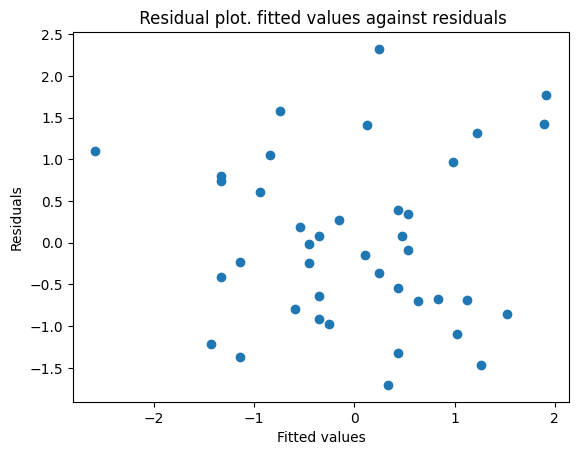

In [36]:
# Draw a scatter plot of fitted values against residuals and check the homoscedasticity

plt.scatter ( get_generalised_values(model.fittedvalues),get_generalised_values(model.resid))
plt.title(" Residual plot. fitted values against residuals")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# outlier analysis

#### outliers are observations whose values show a large deviation from the mean value.


#### Z-score -->>  measures the distance between a data point and the mean using standard deviations
#### Mahalanobis distance
#### Cooks distance
#### leverage values


In [38]:
# Z- score : using zscore() method in scipy.stats
from scipy.stats import zscore
df['salary_zscore'] = zscore(df['Salary'])


In [39]:
df[ (df.salary_zscore > 3.0)| (df.salary_zscore < -3.0)]

,S. No.,Percentage in Grade 10,Salary,salary_zscore


# Cook's distance

Text(0, 0.5, 'Cooks distance')

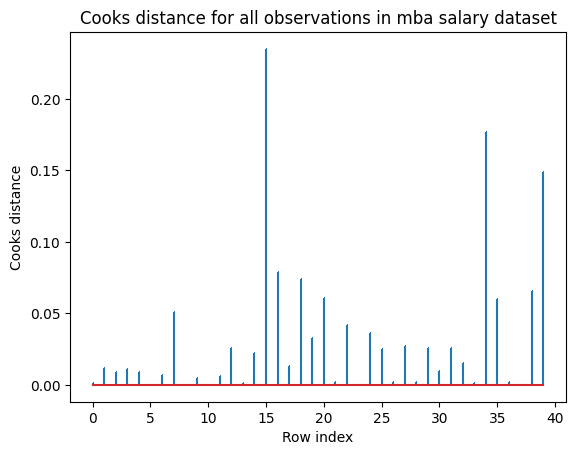

In [40]:
# use get_influence() method of the model we built.
# statsmodels.regression.linear_model.OLSResults.get_influence() calculates influence and outliers.

mba_influence = model.get_influence()
(c,p)  = mba_influence.cooks_distance

plt.stem(np.arange(len(train_X)), np.round(c,3), markerfmt = ",");

plt.title("Cooks distance for all observations in mba salary dataset")
plt.xlabel("Row index")
plt.ylabel("Cooks distance")


# Leverage Values

In [ ]:
## Leverage value of an observation measures the influence o that observation on the 
##  overall fit of regression function and it is related to mahalaobis distance.

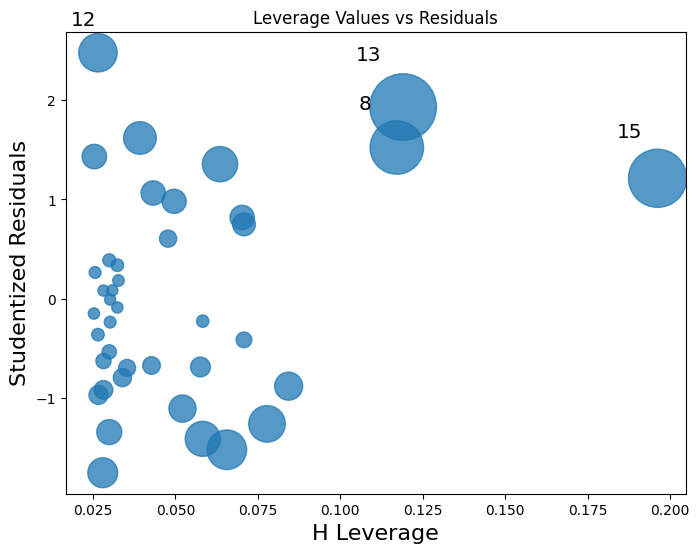

In [41]:
from statsmodels.graphics.regressionplots import influence_plot

# The plot shows the residual on the vertical axis, leverage on the horizontal axis, 
# and the point size is the square root of Cook's D statistic, a measure of the influence of the point

fig,ax = plt.subplots(figsize=(8,6))
influence_plot(model, ax=ax)
plt.title("Leverage Values vs Residuals")
plt.show()

# Making Predictions and Prediction intervals

In [43]:
pred_y = model.predict(test_X)
print(test_X,pred_y)

    const  Percentage in Grade 10
6     1.0                    70.0
36    1.0                    68.0
37    1.0                    52.0
28    1.0                    58.0
43    1.0                    74.5
49    1.0                    60.8
5     1.0                    55.0
33    1.0                    78.0
20    1.0                    63.0
42    1.0                    74.4 6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
49    247070.998530
5     226419.591709
33    308313.101515
20    254904.290772
42    295494.986937
dtype: float64


In [42]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#Predict the y values
pred_y = model.predict(test_X)

_,pred_y_low,pred_y_high = wls_prediction_std(model,test_X,alpha = 0.1)

# store these values in a DataFrame
pred_y_df = pd.DataFrame({'grade_10_perc':test_X['Percentage in Grade 10'],
                           'pred_y': pred_y,
                        'pred_y_left':pred_y_low,
                         'pred_y_rifgt':pred_y_high})

In [44]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_rifgt
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182


# Find R-squared and RMSE -->> to find accuracy

# sklearn.metrics library has r2_score and mean_squared_error for measuring R-squared and MSE values.
1. We need to take the sq root of MSE value to get RMSE.
2. Both methods take pred_y and actual y values to calculate accuracy measures.
3. numpy module has sqrt method to calculate sqrt.


In [45]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_y,pred_y))

0.156645849742304

In [46]:
np.sqrt(mean_squared_error(test_y,pred_y))

73458.04348346895